# 머신러닝

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetes_for_test.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. 데이터 탐색
### (1) 시각화 포함 탐색적 자료분석 시행(EDA)


- 데이터 탐색 : 데이터 분석 전 그래프나 통계적인 방법으로 다양한 각도에서 데이터의 특징을 파악하고 직관적으로 보는 분석방법
- EDA 목표 : 분석하고자 하는 자료들의 유형, 범위, 수준 확인, 단독 or 여러 변수를 함께 사용하여 분포와 의미 고찰
- 탐색적 데이터 분석(EDA)의 4가지 주제(4R)
    - 저항성(Resistance) : 부분적 변동에 민감하지 않음, 오류점, 이상값의 영향을 적게 받음
    - 잔차 해석(Residuals) : 주 경향에서 벗어난 특징 파악(+왜 존재하는지 탐색)
    - 자료 재표현(Re-expression) : 원래 변수를 적당한 척도로 바꾸기(대칭성, 선형성, 안정성 등 구조 파악) by 로그, 제곱근, 역수변환 등
    - 현시성(Representation) : 분석 결과를 쉽게 이해할 수 있도록 시각화
    

**교재 해답** 1) 종속변수에 따른 독립변수의 분포 시각화
- 우선 당뇨 데이터를 분석하기 위해서 당뇨병 유무에 따른 독립변수의 분포를 살펴볼 필요 존재
- 따라서 당뇨병 유무로 그룹화, 아래와 같이 그룹별 평균 데이터 만들음


In [14]:
#outcome 그룹별 평균 테이블 만들기
diabetes = data.groupby('Outcome').mean()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


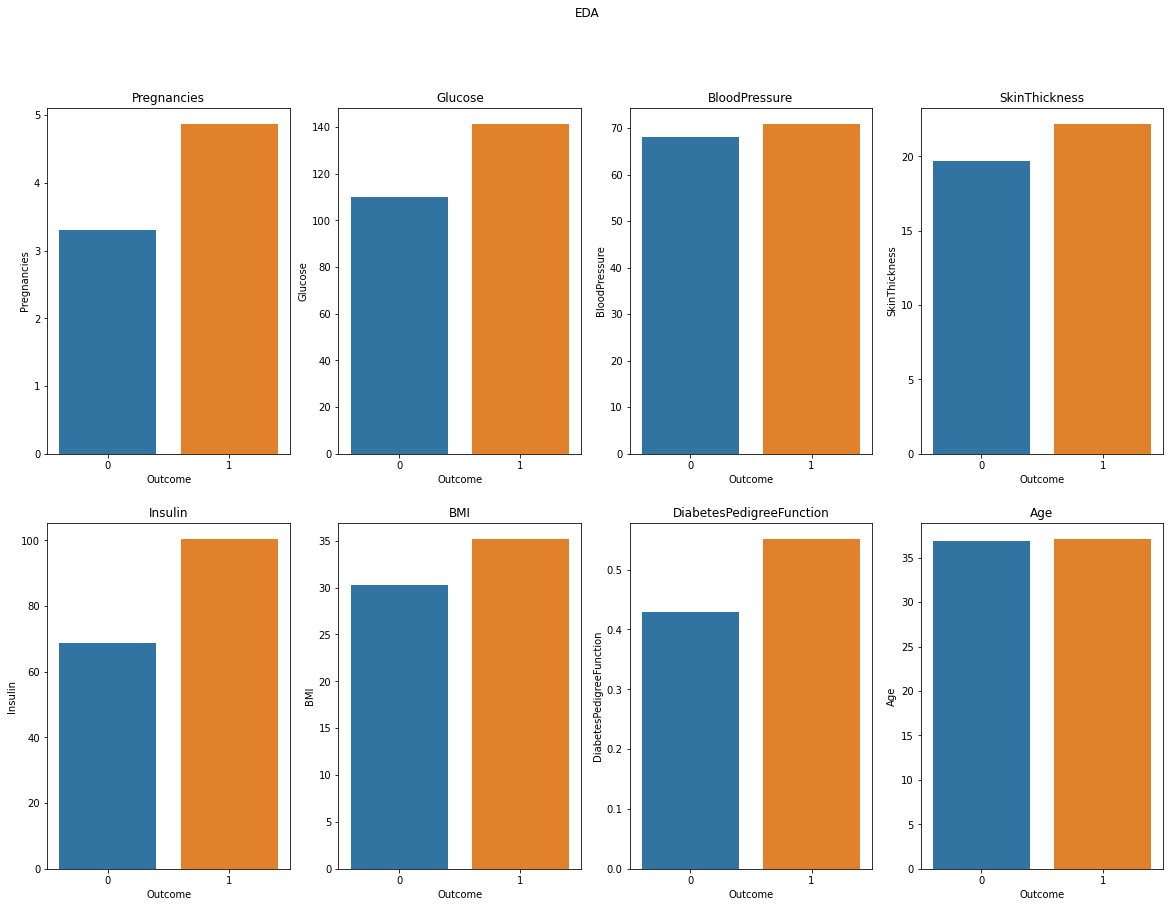

In [15]:
#막대그래프로 outcome 그룹별 평균 시각화
fig, axes = plt.subplots(2,4, figsize=(20,14))
for i in range(4):
    sns.barplot(diabetes.index, diabetes.iloc[:,i], ax = axes[0][i])
    axes[0][i].set_title(diabetes.columns[i])

for i in range(4):
    sns.barplot(diabetes.index, diabetes.iloc[:,i+4], ax = axes[1][i])
    axes[1][i].set_title(diabetes.columns[i+4])

plt.suptitle("EDA");

[EDA 해석]
- 당뇨병이 있는 사람은 없는 사람보다 Pregnancies의 평균 수치가 높다.
- 당뇨병이 있는 사람은 없는 사람보다 Glucose의 평균 수치가 높다.
- 당뇨병이 있는 사람은 없는 사람보다 Insulin의 평균 수치가 높다.
- 당뇨병이 있는 사람은 없는 사람보다 BMI의 평균 수치가 높다.


**교재 해답** 2) 각변수의 상관관계 시각화 -> 다중공선성문제 확인


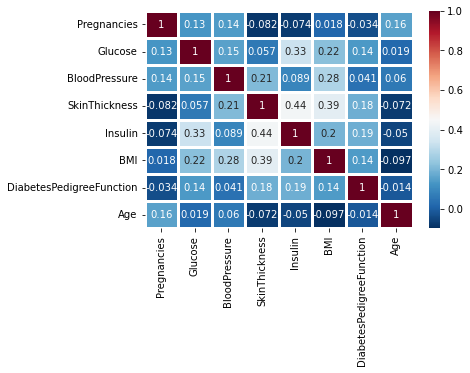

In [10]:
import seaborn as sns

df_cor = data.drop(columns=["Outcome"]).corr(method='pearson')
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,yticklabels = df_cor.columns,
           cmap='RdBu_r', annot= True, linewidth = 3 );
#0.9 이상의 상관관계를 가지는 변수 없음
# 모든 변수 사용하여 모델링해도 될 것으로 판단됨

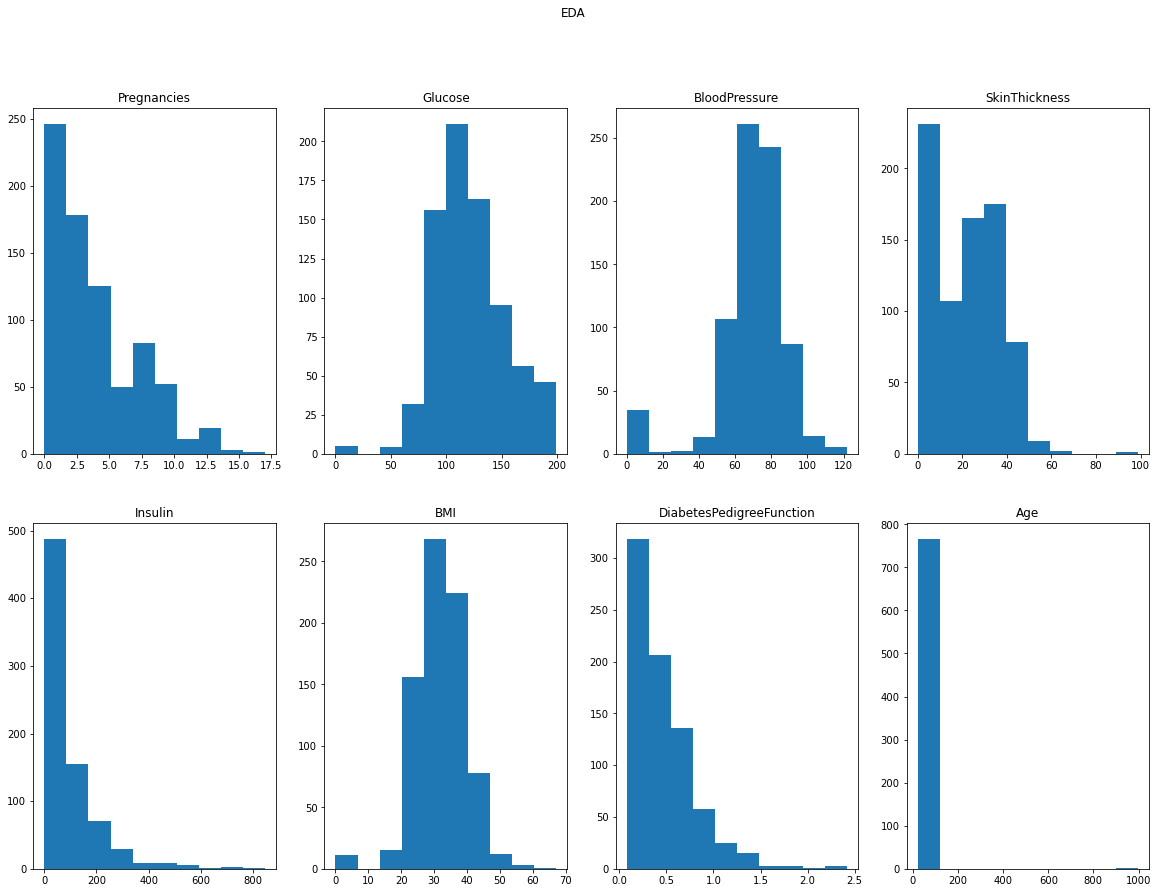

In [26]:
#막대그래프로 outcome 그룹별 평균 시각화
fig, axes = plt.subplots(2,4, figsize=(20,14))
for i in range(8):
    if i < 4:
        axes[0][i].hist( data.iloc[:,i])
        axes[0][i].set_title(data.columns[i])
    else :
        axes[1][i-4].hist(data.iloc[:,i])
        axes[1][i-4].set_title(data.columns[i])

plt.suptitle("EDA");

### (2) 이상치를 식별하고 처리하시오.

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


- describe로 확인 결과 각 변수의 결측치는 없음 확인
- 이상치를 판단하기 위해선 mean, min, max값 확인
- 평균과 min, 평균과 max값이 std에 비해 한참 차이가 난다면 이상치가 있을 가능성이 높음
- 이상치를 정확하게 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 가장 정확함

In [29]:
# boxplot을 한번에 그리귀 위하여 melt를 이용해 데이터 재구조화
x = data.drop(columns = ["Outcome"])
df_v1 = pd.melt(x, var_name = 'col', value_name='value')
df_v1.head()

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0


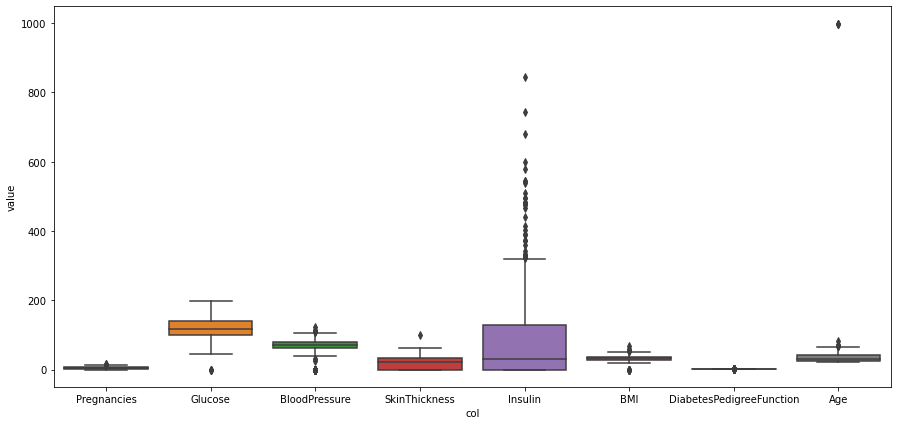

In [30]:
plt.figure(figsize=(15, 7))
sns.boxplot(x= 'col', y = 'value', data = df_v1)
plt.xticks(range(8), x.columns)
plt.show();

- age의 경우 중앙값과 멀리 떨어진 이상치가 눈에 띄임
- insulin의 경우 이상치들이 있지만 이상치들이 연속적으로 이어져있어 현업의 의견이 필요할 것으로 판단됨
- 우선 눈에 보이는 age의 이상치만을 처리하도록 함

Age의 중앙값 :  29.0


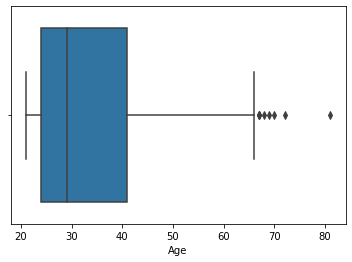

In [33]:
print("Age의 중앙값 : ", data.Age.median())
outlier_index = data[data['Age']>150].index
data.loc[outlier_index,"Age"] = data.Age.median()
sns.boxplot(data["Age"]);

- 추가적으로 데이터를 살펴보았을 때, Glucose와 BloodPressure 컬럼에는 0이 존재하지 않아야 된다고 판단됨
- 이를 이상치라고 판단하여 이상치를 제외한 중앙값을 이상치로 대체

In [34]:
outlier_index = data[data["Glucose"]==0].index
data.loc[outlier_index, "Glucose"] = data.Glucose.median()
outlier_index = data[data["BloodPressure"]==0].index
data.loc[outlier_index, "BloodPressure"] = data.BloodPressure.median()

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오

- 최솟값과 최댓값의 차이가 많이 나는 컬럼 존재
- 선형 모델 사용 시 scale을 적용할 필요가 있어보임

## 2. 클래스 불균형 처리
### (1) 업샘플링 과정을 설명하고 결과 작성하기

- 오버 샘플링 기법은 소수 클래스(minority class)를 다수 클래스(majority class)의 수만큼 추가로 생성해서 데이터 불균형을 극복하는 방식이다.
- 언더 샘플링은 데이터의 손실 문제로 인해 예측 성능이 저하되는 단점이 있으므로, 일반적으로 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

1) random oversampling
- 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식
- 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성
- random oversampling은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

2) SMOTE 
- SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
- resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방법이 아니기 때문에, 과적합 문제를 예방할 수 있다는 장점이 있다.

3) ADASYN
- SMOTE는 모든 minority class로부터 동일한 개수의 샘플을 합성하였으나, ADASYN은 관측치별로 가중치(weight)를 주어서 각 관측치마다 생성하는 샘플의 수가 다르다. 
- weight는 knn 범위 내로 들어오는 다수 클래스의 개수에 비례한다.
- 소수 class 근방에 다수 class가 많으면 classifier가 다수 class로 분류할 가능성이 높기 때문에 이러한 문제를 보완할 수 있다.

In [35]:
## 데이터 불균형 확인
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
## 업샘플링
from imblearn.over_sampling import RandomOverSampler
X = data.drop("Outcome", axis=1)
y = data[["Outcome"]]

ros = RandomOverSampler()
x_upsampling, y_upsampling = ros.fit_resample(X,y)

print("기존 타깃 분포")
print(data["Outcome"].value_counts()/len(data))
print("-"*10)
print("upsampling의 타깃 분포")
print(y_upsampling["Outcome"].value_counts()/len(y_upsampling))

기존 타깃 분포
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
----------
upsamping의 타깃 분포
1    0.5
0    0.5
Name: Outcome, dtype: float64


In [37]:
from imblearn.over_sampling import SMOTE, ADASYN
print("기존 타깃 분포")
print(data["Outcome"].value_counts()/len(data))

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

print("-"*10)
print("SMOTE의 타깃 분포")
print(y_smote["Outcome"].value_counts()/len(y_smote))

adasyn = ADASYN()
x_adasyn, y_adasyn = adasyn.fit_resample(X,y)
print("-"*10)
print("ADASYN의 타깃 분포")
print(y_adasyn["Outcome"].value_counts()/len(y_adasyn))

기존 타깃 분포
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
----------
upsamping의 타깃 분포
1    0.5
0    0.5
Name: Outcome, dtype: float64
----------
upsamping의 타깃 분포
0    0.514403
1    0.485597
Name: Outcome, dtype: float64


### (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오
- undersampling은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식이다.
- random Under Sampling : random으로 다수 클래스의 데이터를 선택해 삭제하는 방법이다.
- Tomek Link 방법 : 서로 다른 클래스가 있을 때 서로 다른 클래스에 가장 가까운 데이터들이 토맥 링크로 묶은 후, 토맥 링크 중 다수 클래스의 데이터를 제거하능 방법이다

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomOverSampler()
X_undersampling, y_undersampling = rus.fit_resample(X,y)

print("기존 타깃 분포")
print(data["Outcome"].value_counts()/len(data))
print("-"*10)
print("undersampling의 타깃 분포")
print(y_undersampling["Outcome"].value_counts()/len(y_undersampling))

기존 타깃 분포
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
----------
undersampling의 타깃 분포
1    0.5
0    0.5
Name: Outcome, dtype: float64


### (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
- 해당 데이터는 over sampling이 적합하다.
- 데이터가 총 768개로, 당뇨병 환자를 대표하기에는 너무 적기 때문이다.
- 심지어 환자의 수는 768명 중 268명 뿐이다.
- under sampling을 선택하게 되면 전체 데이터가 더 적어지기 때문에 오버 피팅이 일어날 위험이 크므로 over sampling을 선택하였다.

## 3. 모델링
### (1) 당뇨병 환자를 예측하는 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 제시하시오.

In [41]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm

log = LogisticRegression()
xgb = XGBClassifier(random_state=0)
svm_clf = svm.SVC(kernel="linear")
#속도 측면에서 Logistic Regression, 
#정확도 측면에서 svm, 기타로 xgboost를 제시한다

### (2) 모델을 비교하고 결과를 설명하시오
- 해당 모델들을 데이터에 맞게 바로 적용시키고 비교하기 위해 아래와 같이 객체화시켰다.

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

## 5개의 경우의 수로 분할하여 검증
kfold = KFold()
def model_result(model):
    pred_li=[]
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index, :]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        start = time.time()
        model.fit(X_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred, y_test["Outcome"]))
        
    ## 마지막 데이터 학습 속도
    print(f"{end - start:.5f} sec")
    ## 5개의 train 데이터에 대한 정확도의 평균 값
    print(np.mean(pred_li))

In [45]:
#Logistic regression의 속도, 성능 확인
model_result(log)

0.03191 sec
0.7422544775485951


In [46]:
#xgboost의 속도, 성능 확인
model_result(xgb)

0.15797 sec
0.7474492827434004


In [47]:
# svm의 속도, 성능 확인
model_result(svm_clf)

4.24439 sec
0.7605126899244546


- 데이터의 수가 적기 때문에 Hold-out 기법이 아니라 Cross-validation 기법으로 성능을 확인
- over sampling 기법인 smote 활용
- 예상대로 Logistic Regression이 가장 빨랐음
- svm의 성능이 가장 좋음

### (3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

- 속도 개선을 위해 차원축소방법인 PCA를 사용할 수 있다.
- 예측의 성능은 원본의 데이터를 그대로 사용하는 것보다 떨어질 수 있지만, 차원을 축소함으로써 예측의 속도는 훨씬 상승시킬 수 있다. 
- PCA를 사용할 때 데이터 스케일에 따라 각 주성분이 설명 가능한 분산량이 달라질 수 있기 때문에 **데이터 스케일링**을 꼭 해주어야 한다.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                   test_size = 0.3, random_state=2022)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
pca = PCA(n_components = 8)
X_train_pca = pca.fit(X_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())


[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546328


- 간략하게, 해당 데이터에서 독립변수를 차원 축소 시켜 적절한 주성분의 개수를 찾아보고자 하였다.
- 8개의 독립변수 대신에 5주성분까지 사용하면, 전체 데이터의 81%를 설명할 수 있음을 파악하였다.

In [56]:
# 5개의 주성분을 가지고 모델링하는 코드 작성
def pca_model_result(model):
    pred_li = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index, :]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        scaler = StandardScaler()
        X_train_res_s = scaler.fit_transform(X_train_resample)
        X_test_s = scaler.transform(X_test)
        
        pca = PCA(n_components=5)
        X_train_pca = pca.fit_transform(X_train_res_s)
        X_test_pca = pca.transform(X_test_s)
        
        start = time.time()
        model.fit(X_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test_pca)
        pred_li.append(accuracy_score(pred, y_test["Outcome"]))
        
    print(f"{end-start:.5f} sec")
    print(np.mean(pred_li))

In [57]:
pca_model_result(log)

0.00299 sec
0.7279093455564045


In [58]:
pca_model_result(xgb)

0.16598 sec
0.7031491384432561


In [60]:
pca_model_result(svm_clf)

0.03690 sec
0.7253034547152193


- 예측 성능은 다소 떨어졌지만, 속도 측면에도 차원 축소에 의해 더 빨라졌다.
- 향후 데이터가 크게 늘어난다면 차원축소를 통해 성능 및 속도 측면에서 더 유의미한 결과를 찾아낼 수 있을 것이다.

# 통계 분석
## 1. 회사 제품의 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오(유의확률 : 0.05).


### (1) 귀무가설과 대립가설을 작성하시오

- 답

|가설 종류|내용|
|-|-|
| 귀무가설(H0)| 제품들의 금속 재질 함유량 분산은 1.3이다.|
| 대립가설(H1)| 제품들의 금속 재질 함유량 분산은 1.3이 아니다.|


### (2) 가설을 양측 검정하시오.

In [61]:
import pandas as pd
import numpy as np

## 데이터 불러오기
df = pd.read_csv("metalicity.csv")
df.head()

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529


In [63]:
df.describe() #150개 행

,metalicity
count,150.000000
mean,45.266630
std,0.862091
min,42.731551
25%,44.597182
50%,45.360851
75%,45.833077
max,47.036938


- 정규성 검정!
- 가설을 검정하기 전에 해당 데이터가 정규성을 띄는지 먼저 판단해야 한다.

    - 귀무가설(H0) : 정규성을 가진다.
    - 대립가설(H1) : 정규성을 가지지 않는다.

In [62]:
## 해당 분포가 정규분포인지부터 판단
import scipy.stats as stats
print(stats.shapiro(df["metalicity"]))

ShapiroResult(statistic=0.9822470545768738, pvalue=0.050023749470710754)


- p-value >0.05 이므로 귀무가설을 기각하지 못한다. 즉 정규성을 띈다.
- 표본 데이터가 정규성을 가지므로 정규분포를 따르는 분산이 1.3인 비교 데이터를 만들어주고 등분산 검정을 진행할 수 있다.

In [65]:
## 정규분포이며,
#해당 데이터의 평균(45.27)을 갖고 분산이 1.3인 150행의 데이터를 만들고
#등분산 검정 진행
test = np.random.normal(np.mean(df),1.3**0.5, 150 )
test

array([44.13379399, 46.29455257, 45.3663165 , 44.86827616, 43.78323111,
       43.02960814, 46.19681093, 44.95604154, 45.85769289, 47.08139237,
       46.09585319, 45.43508209, 46.56384548, 47.54796729, 43.81228072,
       46.84921914, 43.47166155, 46.48843364, 44.34335121, 44.64168706,
       43.59639817, 45.76439345, 46.16133448, 45.08938874, 45.11903035,
       43.98818675, 45.3665424 , 45.5530128 , 46.63415637, 45.49819548,
       44.83023699, 46.01970782, 43.42139994, 45.81189911, 45.85958754,
       44.58772358, 45.6070984 , 45.51024168, 44.61584488, 45.56539885,
       46.25631738, 45.42501389, 45.62268267, 44.71263796, 45.84629711,
       45.22758148, 46.23658571, 46.25852191, 43.67382239, 44.27378797,
       47.57611318, 45.60225453, 44.04188209, 44.32204543, 45.40508053,
       45.34092302, 43.59389159, 43.87011879, 44.72606344, 44.0118997 ,
       46.05989539, 44.33135201, 44.48929867, 44.60363329, 45.29346398,
       44.19623419, 43.65475175, 46.5095951 , 46.15424019, 44.59

In [66]:
stats.levene(df['metalicity'], test)

LeveneResult(statistic=9.660298577339255, pvalue=0.002064679300834096)

- 등분산 검정 결과 p-value 값이 0.05보다 작으므로 귀무가설을 기각한다.
- 즉, 제품들의 금속 재질 함유량 분산은 1.3이 아니다.

## 2. 제품 200개 Lot별 불량 제품 수량 데이터에 대해 p-관리도를 구하고 시각화하시오.

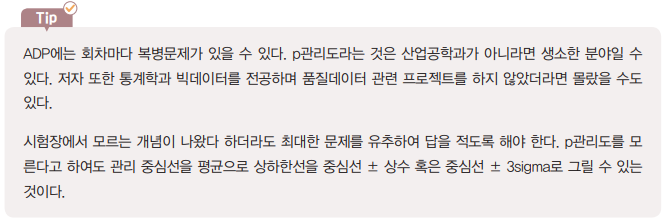

### (1) p관리도에 따라 관리중심선(Center Line), 관리 상한선, 하한선을 구하시오.

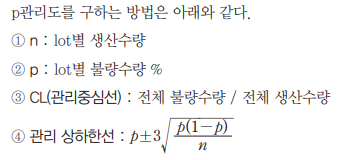

In [68]:
df2 = pd.read_csv("lot_quality.csv", index_col = "lot")
df2.head()

"""또는
df2 = pd.read_csv("lot_quality.csv")
df2 = df2.set_index("lot")
"""

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15


In [69]:
df2["p"] = df2["불량수량"]/df2["생산수량"]
df2["UCL"] = df2["p"] + (3*(df2["p"]*(1-df2["p"])/df2["생산수량"])**0.5)
df2["LCL"] = df2["p"] - (3*(df2["p"]*(1-df2["p"])/df2["생산수량"])**0.5)

## 관리중심선 : 전체 불량 비율
CL = df2["불량수량"].sum()/ df2["생산수량"].sum()
print("관리중심선 : ", CL)

df2

관리중심선 :  0.029024320840935338


,생산수량,불량수량,p,UCL,LCL
lot,,,,,
1,587,19,0.032368,0.054282,0.010454
2,588,15,0.025510,0.045017,0.006004
3,455,19,0.041758,0.069892,0.013625
4,666,12,0.018018,0.033481,0.002555
5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...
196,631,18,0.028526,0.048407,0.008645
197,565,21,0.037168,0.061044,0.013292
198,570,12,0.021053,0.039092,0.003013


### (2) 관리도를 시각화하시오.

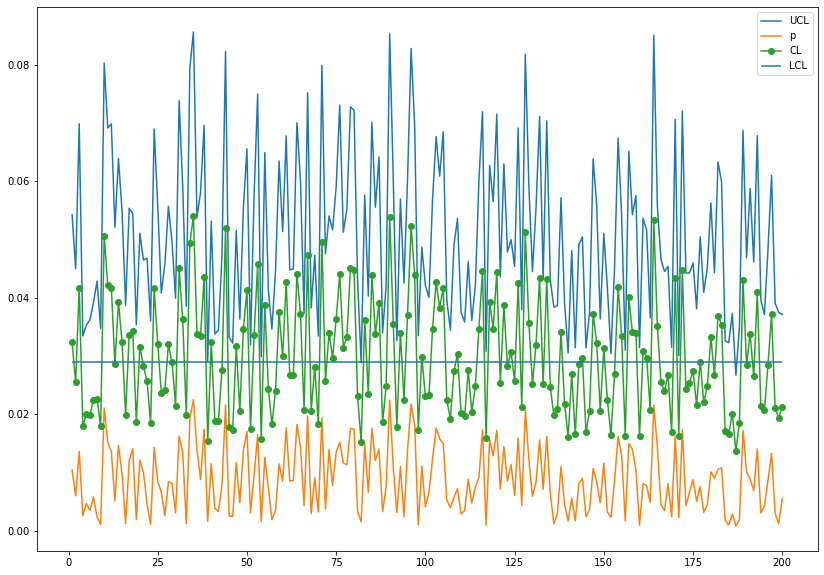

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(df2["UCL"])
plt.plot(df2["LCL"])
plt.plot(df2["p"], marker = 'o')
plt.hlines(CL,1,200)
plt.legend(["UCL",'p','CL','LCL']);

## 3. 제품 1, 이를 만드는 데 재료 a,b,c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품 2의 개수를 구하라.

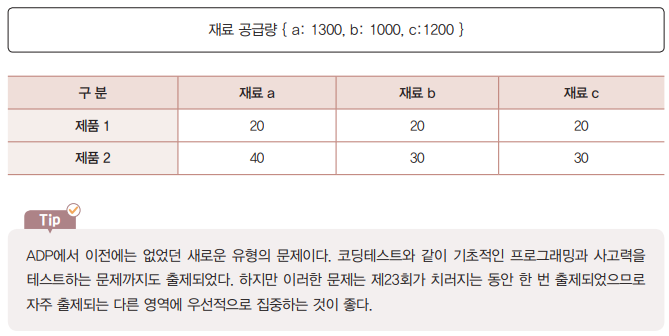

- 반복문을 이용
- 제품 2를 최대로 만드는 경우에서 제품 2의 개수를 하나씩 줄여가면서 제품 1 만들기
- 원재료로 제품 2를 만들 수 있는 최대 수량 : 32
- 남은 원재료 (a: 20, b: 40, c: 240)

In [78]:
#제품 2를 만들 수 있는 최대 수량 : 32개
#a만 고려 시 :  1300/40 = 32.5 -> 32개
#b만 고려 시 : 1000/30 = 33.3 -> 33개
#c만 고려 시 : 1200/30 = 40 -> 40개

#제품 2를 32개 만들고 남은 개수
print("a",1300 - (40*32))
print("b",1000 - (30*32))
print("c",1200 - (30*32))

a 20
b 40
c 240


In [79]:
## 제품1 : x, 제품2 : y
## y가 최대였을 때(32개)부터 하나씩 줄여가며 최댓값 갱신
x = 0
y = 32
max_profit = 32*18
material_a = 20
material_b = 40
material_c = 240

while ((material_a > 0) or (material_b > 0 ) or (material_c >0)):
    y -= 1 #y를 1개 덜 만들었을때 남은 a,b,c
    material_a += 40
    material_b += 30
    material_c += 30
    
    #제품 1을 만들수 있는 조건에 해당할 경우
    while ((material_a >= 20) and (material_b >=20) and (material_c >=20)):
        x+=1
        material_a -= 20
        material_b -= 20
        material_c -= 20
        
        if (y*18 + x*12)> max_profit:
            max_profit = (y*18 + x*12)
            result_x = x
            result_y = y
    if y == 0:
        break
        
print("최대 수익은", max_profit, "만원이다.")
print("제품 1 수량 : ", result_x)
print("제품 2 수량 : ", result_y)


최대 수익은 600 만원이다.
제품 1 수량 :  5
제품 2 수량 :  30


## 4. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.
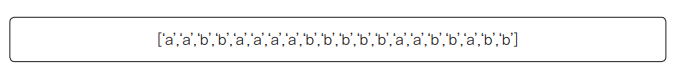

### (1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.

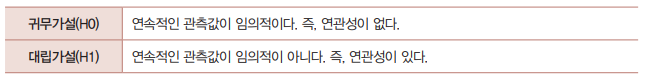

**Run Test(런검정)**

- Run Test : 일련의 연속적인 관측값들이 임의적(random)으로 나타난 것인지 검정하는 방법, 관측값들이 얻어진 순서에 근거하는 비모수적 검정법
- 런(Run) : (통계학) 한 종류의 부호(+ or -)가 시작해 끝날 때까지, 즉 특정 부호가 반대의 분호로 바뀔 때까지를 하나의 런으로 정의
- (ex) +++++----+++---++++ 
    - 총 관측치 개수=25
    - 첫 번째 런(+++++)의 길이 = 5, 두번째 런(----)의 길이 = 4, 세 번째 런(+++)의 길이 = 3, 네 번째 런(---)의 길이 = 3, 다섯 번째 런(++++)의 길이 = 4, 
    - 총 런의 개수 = 5
    - (+)의 총 개수 = 12 , (-)의 총개수 = 7
- 관측치 간에 상관이 존재한다면 런의 수가 매우 많거나 매우 적을 것
- 런 검정의 영가설(Null hypothesis) : 시계열 데이터들이 무작위로 분포돼 아무런 추세도 없다.

- 사례 예시
    - 야구 구단에서 투수를 영입할 때 경기력에 기복이 있는지 관찰하고 싶은 경우 : 스트라이크나 안타가 시계열상으로 무리지어 있는가(기복이 있다면 스트라이크 이후에 다시 스트라이크가, 안타 이후에 다시 안타가 연이어 나올 확률이 높다)
    

> 교재 해설
- 가설을 검정하기 위해 one sample run test를 진행
- 해당 테스트를 진행하기 위해 데이터를 수치형으로 변환해야하므로 전처리 진행

In [ ]:
import pandas as pd
data = ["a","a","b","b","a","a","a","a","b","b","b","b","b",\
       "a","a","b","b","a","b","b"]
test_df = pd.DataFrame(data, columns = ["product"])
test_df.loc[test_df["product"]=="a","product"] = 1
test_df.loc[test_df["product"]=="b","product"] = 0
test_df["product"]

In [87]:
from statsmodels.sandbox.stats.runs import runstest_1samp
stats_result, p_value_result = runstest_1samp(test_df["product"])
print("통계량 : ",stats_result)
print("p-value : ",p_value_result)

통계량 :  -1.1144881152070183
p-value :  0.26506984027306035


### (2) 가설 채택
- 검정 결과 p-value는 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.
- 즉 상품 a와 b의 구매에는 연관이 없다고 할 수 있다.